# Data analysis: Bugs

This program produces an analysis of data from a psychology experiment where the subjects rated
how much they wanted to kill the bugs that were deemed to be either disgusting or non-disgusting
and either frightening or non-frightening.

The program prints:

• Summary statistics of the kill ratings for each type of bug:
◦ minimum
◦ maximum
◦ median
◦ mean
◦ Standard Deviation

• The results of a linear model with kill rating as the outcome variable and the categories of
bug as the predictor variables.

• Boxplots with overlaid points showing the distribution of kill ratings for each category of
bug. 

In [15]:
#import cell
import pandas

from statistics import median, mean, stdev

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

## Preparing data

### 1.Load data

In [16]:
#Raise an error in case of an wrongly written url
url = 'https://raw.githubusercontent.com/luketudge/stats-tutorials/master/tutorials/data/bugs.csv'
try:
    df = pandas.read_csv(url)
except IOError:
    raise FileNotFoundError('URL does not exist!')   

In [17]:
df

,Subject,Sex,Disgust,Fear,KillRating
0,1,Female,low,low,6.0
1,3,Female,low,low,5.0
2,4,Female,low,low,6.0
3,5,Female,low,low,3.0
4,6,Female,low,low,2.0
...,...,...,...,...,...
343,96,Male,high,high,10.0
344,97,Female,high,high,10.0
345,98,Female,high,high,10.0
346,99,Female,high,high,10.0


In [18]:
#Variables
predictor1 = 'Disgust'
predictor2 = 'Fear'
outcome = 'KillRating'

### 2.Create categories of bugs

In [19]:
#Helper function
def label_bug(row):   
    """ Classifies the bug based on the values of two columns
        Argument: a row 
        Returns: a string that represents one of four possible categories of the bugs  
                 or None in other instances (e.g there is a missing value in one column)
    """
    if row[predictor1] == 'low' and row[predictor2] == 'low' :
        return '1. Low {} and Low {}'.format(predictor1, predictor2)
    elif row[predictor1] == 'low' and row[predictor2] == 'high' :
        return '2. Low {} and High {}'.format(predictor1, predictor2)
    elif row[predictor1] == 'high' and row[predictor2] == 'low' :
        return '3. High {} and Low {}'.format(predictor1, predictor2)
    elif row[predictor1] == 'high' and row[predictor2] == 'high' :
        return '4. High {} and High {}'.format(predictor1, predictor2)
    else:
        return None

#Create a new column that tells the category of the bug, by applying our helper function in each row
df['bug_category'] = df.apply (label_bug, axis=1)

#Remove rows that have missing values in our new column
df = df.dropna(axis=0, subset=['bug_category'])

In [20]:
df

,Subject,Sex,Disgust,Fear,KillRating,bug_category
0,1,Female,low,low,6.0,1. Low Disgust and Low Fear
1,3,Female,low,low,5.0,1. Low Disgust and Low Fear
2,4,Female,low,low,6.0,1. Low Disgust and Low Fear
3,5,Female,low,low,3.0,1. Low Disgust and Low Fear
4,6,Female,low,low,2.0,1. Low Disgust and Low Fear
...,...,...,...,...,...,...
343,96,Male,high,high,10.0,4. High Disgust and High Fear
344,97,Female,high,high,10.0,4. High Disgust and High Fear
345,98,Female,high,high,10.0,4. High Disgust and High Fear
346,99,Female,high,high,10.0,4. High Disgust and High Fear


## Summary statistics

In [21]:
#Summarize statistics of the kill ratings (outcome) for each category of bug:
summary_stats = [min, median, mean, stdev, max]

#Grouped summary
summary = df.groupby(['bug_category']).aggregate({outcome: summary_stats})

print(summary)

                              KillRating                                 
                                     min median      mean     stdev   max
bug_category                                                             
1. Low Disgust and Low Fear          0.0    6.0  5.632184  2.680094  10.0
2. Low Disgust and High Fear         0.5    8.0  7.339080  2.551213  10.0
3. High Disgust and Low Fear         0.0    7.5  6.660920  3.151683  10.0
4. High Disgust and High Fear        0.0    8.5  7.804598  2.495760  10.0


## Linear model

### 1.Prepare the data

In [22]:
#Encode categorical variables as dummy variables, to fit into regression
#Remove of one dummy variable(drop_first) to avoid the dummy variable trap
embarked_dummies=pandas.get_dummies(df.bug_category, drop_first=True)

#Join the main dataframe and dummy variables
df = pandas.concat([df, embarked_dummies], axis=1)

#split the dataset into the training set and test set
X = embarked_dummies
y = df[outcome]
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = .20, random_state=1)



In [25]:
df

,Subject,Sex,Disgust,Fear,KillRating,bug_category,2. Low Disgust and High Fear,3. High Disgust and Low Fear,4. High Disgust and High Fear
0,1,Female,low,low,6.0,1. Low Disgust and Low Fear,0,0,0
1,3,Female,low,low,5.0,1. Low Disgust and Low Fear,0,0,0
2,4,Female,low,low,6.0,1. Low Disgust and Low Fear,0,0,0
3,5,Female,low,low,3.0,1. Low Disgust and Low Fear,0,0,0
4,6,Female,low,low,2.0,1. Low Disgust and Low Fear,0,0,0
...,...,...,...,...,...,...,...,...,...
343,96,Male,high,high,10.0,4. High Disgust and High Fear,0,0,1
344,97,Female,high,high,10.0,4. High Disgust and High Fear,0,0,1
345,98,Female,high,high,10.0,4. High Disgust and High Fear,0,0,1
346,99,Female,high,high,10.0,4. High Disgust and High Fear,0,0,1


### 2.Results of linear model

In [23]:
#fitting
reg = LinearRegression().fit(X_train,y_train)

#explore the output
print('Intercept: ', reg.intercept_)
print('Coefficients: ', reg.coef_)

#evaluate the model
y_pred = reg.predict(X_test)
df1 = pandas.DataFrame({'Actual': y_test, 'Predicted': y_pred})

print(df1)
print('Mean squared error: ', mean_squared_error(y_test, y_pred))
print('R2:', r2_score(y_test,y_pred))

Intercept:  5.691780821917809
Coefficients:  [1.43321918 0.95107632 2.13216284]
     Actual  Predicted
85      9.0   5.691781
191     8.5   6.642857
107    10.0   7.125000
105     4.5   7.125000
123     2.0   7.125000
..      ...        ...
347     3.0   7.823944
92     10.0   7.125000
29      4.5   5.691781
58      2.0   5.691781
192     5.0   6.642857

[70 rows x 2 columns]
Mean squared error:  7.847481505967478
R2: 0.08544037628158796


## Boxplots

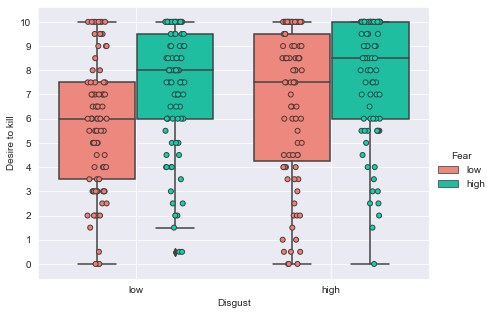

In [24]:
#initialize the figure
plt.figure(figsize=(7,5))
sns.set_style('darkgrid')

#create a palette
our_palette = sns.xkcd_palette(["salmon", "aquamarine"])

#plot the data 
bp = sns.boxplot(x=predictor1, y=outcome, hue=predictor2, data=df, 
                 palette = our_palette)

#add stripplot
bp = sns.stripplot(x=predictor1, y=outcome, hue=predictor2, data=df,
                   jitter=True, dodge=True, linewidth=1, palette = our_palette)

#set grid for each axis, and costumize the yaxis grid 
bp.grid(True, which='major')
bp.yaxis.set_major_locator(MultipleLocator(1))

#set a yaxis label to make it clearer 
plt.ylabel('Desire to kill')

#deal with the legend
handles, labels = bp.get_legend_handles_labels()
lg = plt.legend(handles[0:2], labels[0:2], loc=2,
           bbox_to_anchor=(1, .5), frameon=False, title=predictor2)
